Decision Trees in Python with Scikit-Learn
-------------------------------------------------------------

# 2. Decision Tree for Regression
------------------------------------------------------
<b><font color='green'>( We will be using DecisionTreeRegressor from sklearn.tree.</b> It is fast, simple and takes care of all the Math part. We will concentrate only on Coding and solving the Real time problem. )</font><br><br>
<font color='red'>
We will use petrol_consumption.csv dataset and <b>try to predict gas consumptions</b> (in millions of gallons) in 48 US states <u>based upon</u> gas tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with a drivers license. </font>

**Note :** In the dataset **Petrol_Consumption** is the target variable. 
ile is available in the path:
https://drive.google.com/file/d/12mzwM_KgRb7T9GydP9NCWk92se50mh77/view?usp=drive_link

In [2]:
# Importing Libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# Importing the Dataset
dataset = pd.read_csv('petrol_consumption.csv')

dataset.head()  

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
# To see statistical details of the dataset, execute the following command:

dataset.describe()


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [6]:
# Preparing the Data
# divide the data into attributes and labels
X = dataset.drop('Petrol_Consumption', axis=1)  
y = dataset['Petrol_Consumption']  
print(X.shape)
print(y.shape)

(48, 4)
(48,)


In [8]:
# dividing data into training and testing set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38, 4)
(10, 4)
(38,)
(10,)


In [10]:
# Training and Making Predictions
# Note : we will using DecisionTreeRegressor class, not DecisionTreeClassifier

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
print(regressor)

DecisionTreeRegressor()


[Text(0.7760416666666666, 0.95, 'x[3] <= 0.667\nsquared_error = 13692.341\nsamples = 38\nvalue = 583.974'),
 Text(0.59375, 0.85, 'x[1] <= 4389.5\nsquared_error = 6666.408\nsamples = 34\nvalue = 556.941'),
 Text(0.390625, 0.75, 'x[0] <= 8.75\nsquared_error = 2855.42\nsamples = 21\nvalue = 600.762'),
 Text(0.2604166666666667, 0.65, 'x[2] <= 5350.0\nsquared_error = 2527.34\nsamples = 16\nvalue = 617.312'),
 Text(0.15625, 0.55, 'x[1] <= 3731.5\nsquared_error = 1754.0\nsamples = 7\nvalue = 646.0'),
 Text(0.08333333333333333, 0.45, 'x[1] <= 3645.5\nsquared_error = 1251.188\nsamples = 4\nvalue = 672.25'),
 Text(0.041666666666666664, 0.35, 'x[2] <= 3697.5\nsquared_error = 100.0\nsamples = 2\nvalue = 638.0'),
 Text(0.020833333333333332, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 648.0'),
 Text(0.0625, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 628.0'),
 Text(0.125, 0.35, 'x[1] <= 3687.0\nsquared_error = 56.25\nsamples = 2\nvalue = 706.5'),
 Text(0.10416666666666667, 0.25, 'squared_e

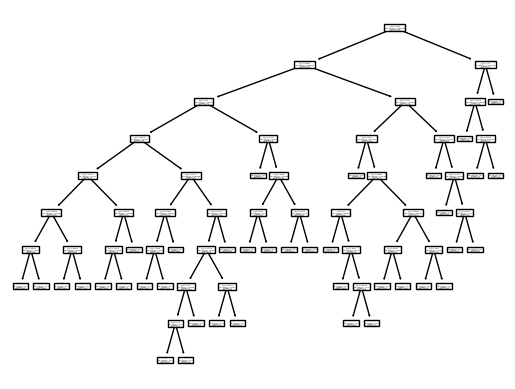

In [22]:
from sklearn import tree
tree.plot_tree(regressor)

In [12]:
# To make predictions on the test set
y_pred = regressor.predict(X_test)

In [20]:
y_pred.shape



(10,)

In [14]:
# Now let's compare the predicted values with the actual values and see how accurate we are:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

    Actual  Predicted
29     534      547.0
4      410      414.0
26     577      574.0
30     571      554.0
32     577      574.0
37     704      574.0
34     487      648.0
40     587      649.0
7      467      414.0
10     580      510.0


**Note** : 

In each case the records compared may be different depending upon the train and test split of the data. Since the train_test_split method randomly splits the data we likely won't have the same training and test sets. For train_test_split with random_state=0 , you would get the same results.

In [16]:
# Evaluating the Algorithm
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 51.6
Mean Squared Error: 5486.6
Root Mean Squared Error: 74.0715869952845


The root mean squared error for our algorithm is ------ , which is more than *10 percent of the mean* of all the values in the '**Petrol_Consumption**' column ( i.e **57.6** ). This means that our algorithm did not do a fine prediction job. Although getting a value **less than 10%** <u>would have been better</u>.

There could many reasons for a Regression Algo to not perform that well, some reasons are : 

**`IMP`** The data sample is too less for training the Model. So instead of testing the model on just 20% of data and judging it , we can do a better job by applying  **CROSS VALIDATION** on our Model. 
